<a href="https://colab.research.google.com/github/bbellaborges/BI-Projects/blob/main/AED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utilizarei a mesma base de dados para realizar análises em 3 cenários diferentes. Vamos à base:

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("collected research people")

In [6]:
df.head()

,Unnamed: 0,Nome,Endereerço,Cidade,Estado,phone,anual_income,Estado Civil,AAge,n_filhos,Moradia,Food_restrictions,streaming,diariamente_sun blocker,Vai na Praia Mensalmente,Faz Academia,Compra e Lê Livros Todos os Anos,Quantidade de Livros Comprados,Autor Favorito,email
0,0,Maria Clara Novaes,NaN,Carvalho,Mato Grosso do Sul,(011) 3908 5991,86445.0,NaN,43.0,NaN,Quitada,Nenhuma,Globo Play,Sim,Não,Sim,NaN,NaN,NaN,mariaclaranovaes285@gemeil.com
1,1,Davi Lucca Pereira>,"Rodovia de Silveira, 67",NaN,Mato Grosso do Sul,NaN,31289.0,NaN,NaN,0.0,De favor,NaN,Todos,NaN,Não,Sim,Não,NaN,NaN,daviluccapereira933@exemplo.com
2,2,Sr. Caio Caldeira,"Residencial Freitas, 10",Carvalho,Rio Grande do Norte,NaN,NaN,S,60.0,NaN,Financiamento,Lactose e Glúten,NaN,Sim,Não,NaN,Sim,6.0,NaN,srcaiocaldeira626@gemeil.com
3,3,Kaique Azevedo%,NaN,Azevedo,Rio Grande do Sul,NaN,76264.0,Casado,26.0,4.0,Quitada,Lactose e Glúten,NaN,Não,Não,Não,Sim,0.0,Enzo Rezende,kaiqueazevedo731@rotmail.com
4,4,Pedro Moreira,"Colônia de Oliveira, 87",NaN,NaN,-0.'8--%/],53295.0,Casado,60.0,5.0,Financiamento,NaN,Globo Play,Sim,Sim,NaN,Sim,7.0,NaN,pedromoreira622@gemeil.com


Como pudemos observar, a base possui dados diversos de diferentes indivíduos (fictícios), possuindo vários NaN, além de uma coluna (a primeira) sem função necessária. Com esse ponto de partida, vamos ao tratamento:

In [7]:
#Excluir coluna Unnamed
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Nome,Endereerço,Cidade,Estado,phone,anual_income,Estado Civil,AAge,n_filhos,Moradia,Food_restrictions,streaming,diariamente_sun blocker,Vai na Praia Mensalmente,Faz Academia,Compra e Lê Livros Todos os Anos,Quantidade de Livros Comprados,Autor Favorito,email
0,Maria Clara Novaes,NaN,Carvalho,Mato Grosso do Sul,(011) 3908 5991,86445.0,NaN,43.0,NaN,Quitada,Nenhuma,Globo Play,Sim,Não,Sim,NaN,NaN,NaN,mariaclaranovaes285@gemeil.com
1,Davi Lucca Pereira>,"Rodovia de Silveira, 67",NaN,Mato Grosso do Sul,NaN,31289.0,NaN,NaN,0.0,De favor,NaN,Todos,NaN,Não,Sim,Não,NaN,NaN,daviluccapereira933@exemplo.com
2,Sr. Caio Caldeira,"Residencial Freitas, 10",Carvalho,Rio Grande do Norte,NaN,NaN,S,60.0,NaN,Financiamento,Lactose e Glúten,NaN,Sim,Não,NaN,Sim,6.0,NaN,srcaiocaldeira626@gemeil.com
3,Kaique Azevedo%,NaN,Azevedo,Rio Grande do Sul,NaN,76264.0,Casado,26.0,4.0,Quitada,Lactose e Glúten,NaN,Não,Não,Não,Sim,0.0,Enzo Rezende,kaiqueazevedo731@rotmail.com
4,Pedro Moreira,"Colônia de Oliveira, 87",NaN,NaN,-0.'8--%/],53295.0,Casado,60.0,5.0,Financiamento,NaN,Globo Play,Sim,Sim,NaN,Sim,7.0,NaN,pedromoreira622@gemeil.com


In [8]:
#padronizar nomes das colunas
novas_colunas = {'Endereerço': 'Endereço',
                 'phone': 'Telefone',
                 'anual_income': 'Renda Anual',
                 'AAge': 'Idade',
                 'n_filhos': 'Filhos',
                 'diariamente_sun blocker' : 'Usa protetor solar diariamente',
                 'Food_restrictions': 'Restrição Alimentar',
                 'streaming': 'Streaming'}
df.rename(columns=novas_colunas, inplace=True)
df.head()

,Nome,Endereço,Cidade,Estado,Telefone,Renda Anual,Estado Civil,Idade,Filhos,Moradia,Restrição Alimentar,Streaming,Usa protetor solar diariamente,Vai na Praia Mensalmente,Faz Academia,Compra e Lê Livros Todos os Anos,Quantidade de Livros Comprados,Autor Favorito,email
0,Maria Clara Novaes,NaN,Carvalho,Mato Grosso do Sul,(011) 3908 5991,86445.0,NaN,43.0,NaN,Quitada,Nenhuma,Globo Play,Sim,Não,Sim,NaN,NaN,NaN,mariaclaranovaes285@gemeil.com
1,Davi Lucca Pereira>,"Rodovia de Silveira, 67",NaN,Mato Grosso do Sul,NaN,31289.0,NaN,NaN,0.0,De favor,NaN,Todos,NaN,Não,Sim,Não,NaN,NaN,daviluccapereira933@exemplo.com
2,Sr. Caio Caldeira,"Residencial Freitas, 10",Carvalho,Rio Grande do Norte,NaN,NaN,S,60.0,NaN,Financiamento,Lactose e Glúten,NaN,Sim,Não,NaN,Sim,6.0,NaN,srcaiocaldeira626@gemeil.com
3,Kaique Azevedo%,NaN,Azevedo,Rio Grande do Sul,NaN,76264.0,Casado,26.0,4.0,Quitada,Lactose e Glúten,NaN,Não,Não,Não,Sim,0.0,Enzo Rezende,kaiqueazevedo731@rotmail.com
4,Pedro Moreira,"Colônia de Oliveira, 87",NaN,NaN,-0.'8--%/],53295.0,Casado,60.0,5.0,Financiamento,NaN,Globo Play,Sim,Sim,NaN,Sim,7.0,NaN,pedromoreira622@gemeil.com


In [9]:
#A coluna de nomes possui caracteres especiais, vamos olhar mais de perto:
df.Nome

,Nome
0,Maria Clara Novaes
1,Davi Lucca Pereira>
2,Sr. Caio Caldeira
3,Kaique Azevedo%
4,Pedro Moreira
5,Sra. Ana Júlia Castro
6,Erick Carvalho
7,Sra. Ana Sophia Vieira
8,Dav4i Nascimento
9,Juan da Mota<


In [10]:
#Com isso em mente, vamos fazer a manipulação:
df['Nome'] = df['Nome'].str.replace('[^a-zA-Zà-úÀ-Ú0-9 ]', '', regex=True)
df.Nome
df.head()

,Nome,Endereço,Cidade,Estado,Telefone,Renda Anual,Estado Civil,Idade,Filhos,Moradia,Restrição Alimentar,Streaming,Usa protetor solar diariamente,Vai na Praia Mensalmente,Faz Academia,Compra e Lê Livros Todos os Anos,Quantidade de Livros Comprados,Autor Favorito,email
0,Maria Clara Novaes,NaN,Carvalho,Mato Grosso do Sul,(011) 3908 5991,86445.0,NaN,43.0,NaN,Quitada,Nenhuma,Globo Play,Sim,Não,Sim,NaN,NaN,NaN,mariaclaranovaes285@gemeil.com
1,Davi Lucca Pereira,"Rodovia de Silveira, 67",NaN,Mato Grosso do Sul,NaN,31289.0,NaN,NaN,0.0,De favor,NaN,Todos,NaN,Não,Sim,Não,NaN,NaN,daviluccapereira933@exemplo.com
2,Sr Caio Caldeira,"Residencial Freitas, 10",Carvalho,Rio Grande do Norte,NaN,NaN,S,60.0,NaN,Financiamento,Lactose e Glúten,NaN,Sim,Não,NaN,Sim,6.0,NaN,srcaiocaldeira626@gemeil.com
3,Kaique Azevedo,NaN,Azevedo,Rio Grande do Sul,NaN,76264.0,Casado,26.0,4.0,Quitada,Lactose e Glúten,NaN,Não,Não,Não,Sim,0.0,Enzo Rezende,kaiqueazevedo731@rotmail.com
4,Pedro Moreira,"Colônia de Oliveira, 87",NaN,NaN,-0.'8--%/],53295.0,Casado,60.0,5.0,Financiamento,NaN,Globo Play,Sim,Sim,NaN,Sim,7.0,NaN,pedromoreira622@gemeil.com


In [11]:
#Agora, na coluna Telefone
df.Telefone

,Telefone
0,(011) 3908 5991
1,NaN
2,NaN
3,NaN
4,-0.'8--%/]
5,+55 (084) 4591-2403
6,84 9687 5023
7,5}|#:}~<7~
8,+55 51 6868 3666
9,NaN


In [12]:
def clean_phone(phone):
    # Remover todos os caracteres que não sejam dígitos
    cleaned_phone = ''.join(filter(str.isdigit, str(phone)))

    # Verificar se o número tem entre 10 e 13 dígitos (formato típico de telefone no Brasil)
    if 10 <= len(cleaned_phone) <= 13:
        return cleaned_phone
    else:
        return np.nan  # Substituir por NaN se não for válido

# Aplicar a função à coluna de telefone
df['Telefone'] = df['Telefone'].apply(clean_phone)
df.Telefone

,Telefone
0,01139085991
1,NaN
2,NaN
3,NaN
4,NaN
5,5508445912403
6,8496875023
7,NaN
8,555168683666
9,NaN


In [13]:
#Em relação à coluna Estado Civil
df['Estado Civil'] = df['Estado Civil'].replace({'S': 'Solteiro',
                            'C': 'Casado',
                            'D': 'Divorciado',
                            'V': 'Viúvo'})
df.head()

,Nome,Endereço,Cidade,Estado,Telefone,Renda Anual,Estado Civil,Idade,Filhos,Moradia,Restrição Alimentar,Streaming,Usa protetor solar diariamente,Vai na Praia Mensalmente,Faz Academia,Compra e Lê Livros Todos os Anos,Quantidade de Livros Comprados,Autor Favorito,email
0,Maria Clara Novaes,NaN,Carvalho,Mato Grosso do Sul,01139085991,86445.0,NaN,43.0,NaN,Quitada,Nenhuma,Globo Play,Sim,Não,Sim,NaN,NaN,NaN,mariaclaranovaes285@gemeil.com
1,Davi Lucca Pereira,"Rodovia de Silveira, 67",NaN,Mato Grosso do Sul,NaN,31289.0,NaN,NaN,0.0,De favor,NaN,Todos,NaN,Não,Sim,Não,NaN,NaN,daviluccapereira933@exemplo.com
2,Sr Caio Caldeira,"Residencial Freitas, 10",Carvalho,Rio Grande do Norte,NaN,NaN,Solteiro,60.0,NaN,Financiamento,Lactose e Glúten,NaN,Sim,Não,NaN,Sim,6.0,NaN,srcaiocaldeira626@gemeil.com
3,Kaique Azevedo,NaN,Azevedo,Rio Grande do Sul,NaN,76264.0,Casado,26.0,4.0,Quitada,Lactose e Glúten,NaN,Não,Não,Não,Sim,0.0,Enzo Rezende,kaiqueazevedo731@rotmail.com
4,Pedro Moreira,"Colônia de Oliveira, 87",NaN,NaN,NaN,53295.0,Casado,60.0,5.0,Financiamento,NaN,Globo Play,Sim,Sim,NaN,Sim,7.0,NaN,pedromoreira622@gemeil.com


Após o tratamento, vamos ao cenário 1:
A empresa Carri Construtora me contratou para encontrar possíveis compradores para os seus novos empreendimentos.

A empresa quer entender as necessidades dos clientes, além de informações como:

  - Quais clientes deve abordar;
  - Qual empreendimento deve mostrar aos clientes;
  - Cliente X está em busca de investir em um imóvel ou comprar para morar?

  Com isso em mente, vamos enxugar nosso dataframe, ficando apenas com as colunas relevantes para nossa análise.

In [14]:
df_carri = df.copy()


In [15]:
drop_carri = [
    'Restrição Alimentar',
    'Streaming',
    'Usa protetor solar diariamente',
    'Quantidade de Livros Comprados',
    'Autor Favorito']

df_carri.drop(columns=drop_carri, inplace=True)
df_carri.head()

,Nome,Endereço,Cidade,Estado,Telefone,Renda Anual,Estado Civil,Idade,Filhos,Moradia,Vai na Praia Mensalmente,Faz Academia,Compra e Lê Livros Todos os Anos,email
0,Maria Clara Novaes,NaN,Carvalho,Mato Grosso do Sul,01139085991,86445.0,NaN,43.0,NaN,Quitada,Não,Sim,NaN,mariaclaranovaes285@gemeil.com
1,Davi Lucca Pereira,"Rodovia de Silveira, 67",NaN,Mato Grosso do Sul,NaN,31289.0,NaN,NaN,0.0,De favor,Não,Sim,Não,daviluccapereira933@exemplo.com
2,Sr Caio Caldeira,"Residencial Freitas, 10",Carvalho,Rio Grande do Norte,NaN,NaN,Solteiro,60.0,NaN,Financiamento,Não,NaN,Sim,srcaiocaldeira626@gemeil.com
3,Kaique Azevedo,NaN,Azevedo,Rio Grande do Sul,NaN,76264.0,Casado,26.0,4.0,Quitada,Não,Não,Sim,kaiqueazevedo731@rotmail.com
4,Pedro Moreira,"Colônia de Oliveira, 87",NaN,NaN,NaN,53295.0,Casado,60.0,5.0,Financiamento,Sim,NaN,Sim,pedromoreira622@gemeil.com


Pensando no projeto minha casa minha vida e tendo como base a renda (necessária) de até 8 mil reais (8*13: até 104 mil reais ao ano), vamos descobrir quantas pessoas da nossa base são elegíveis ao programa:

In [16]:
df_carri.describe()

,Renda Anual,Idade,Filhos
count,25.000000,30.000000,22.000000
mean,67570.640000,44.633333,2.909091
std,20917.823198,16.356973,1.600866
min,22826.000000,18.000000,0.000000
25%,53295.000000,30.250000,2.000000
50%,71448.000000,42.500000,3.000000
75%,86445.000000,60.000000,4.000000
max,95433.000000,78.000000,5.000000


Com isso, observamos que a renda anual máxima do nosso conjunto é de R$ 95.433,00, tornando todos os indivíduos da nossa base elegíveis ao programa. Vamos então inserir uma coluna do Minha Casa Minha Vida:

In [17]:
df_carri['Minha Casa Minha Vida'] = True
df_carri.head()

,Nome,Endereço,Cidade,Estado,Telefone,Renda Anual,Estado Civil,Idade,Filhos,Moradia,Vai na Praia Mensalmente,Faz Academia,Compra e Lê Livros Todos os Anos,email,Minha Casa Minha Vida
0,Maria Clara Novaes,NaN,Carvalho,Mato Grosso do Sul,01139085991,86445.0,NaN,43.0,NaN,Quitada,Não,Sim,NaN,mariaclaranovaes285@gemeil.com,True
1,Davi Lucca Pereira,"Rodovia de Silveira, 67",NaN,Mato Grosso do Sul,NaN,31289.0,NaN,NaN,0.0,De favor,Não,Sim,Não,daviluccapereira933@exemplo.com,True
2,Sr Caio Caldeira,"Residencial Freitas, 10",Carvalho,Rio Grande do Norte,NaN,NaN,Solteiro,60.0,NaN,Financiamento,Não,NaN,Sim,srcaiocaldeira626@gemeil.com,True
3,Kaique Azevedo,NaN,Azevedo,Rio Grande do Sul,NaN,76264.0,Casado,26.0,4.0,Quitada,Não,Não,Sim,kaiqueazevedo731@rotmail.com,True
4,Pedro Moreira,"Colônia de Oliveira, 87",NaN,NaN,NaN,53295.0,Casado,60.0,5.0,Financiamento,Sim,NaN,Sim,pedromoreira622@gemeil.com,True


Agora, vamos observar se, de acordo com os dados apresentados, quais clientes estariam inclinados a investir em um imóvel. Para isso, quem já tem uma casa quitada deve gerir um investimento ao invés de moradia, já quem não tem a casa quitada, pode ser considerado procurando uma, especialmente quem já tem um processo de financiamento. Utilizaremos as que estão quitadas ou com financiamento para considerar possíveis investidores:

In [18]:
np.where(df_carri.Moradia == 'Quitada', True, False) | np.where(df_carri.Moradia == 'Financiamento', True, False)

array([ True, False,  True,  True,  True, False,  True, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False,  True, False, False,  True, False, False, False,  True,
        True, False,  True, False, False, False,  True, False,  True,
        True])

In [19]:
df_carri['Investimento'] = np.where(df_carri.Moradia == 'Quitada', True, False) | np.where(df_carri.Moradia == 'Financiamento', True, False)
df_carri.head()

,Nome,Endereço,Cidade,Estado,Telefone,Renda Anual,Estado Civil,Idade,Filhos,Moradia,Vai na Praia Mensalmente,Faz Academia,Compra e Lê Livros Todos os Anos,email,Minha Casa Minha Vida,Investimento
0,Maria Clara Novaes,NaN,Carvalho,Mato Grosso do Sul,01139085991,86445.0,NaN,43.0,NaN,Quitada,Não,Sim,NaN,mariaclaranovaes285@gemeil.com,True,True
1,Davi Lucca Pereira,"Rodovia de Silveira, 67",NaN,Mato Grosso do Sul,NaN,31289.0,NaN,NaN,0.0,De favor,Não,Sim,Não,daviluccapereira933@exemplo.com,True,False
2,Sr Caio Caldeira,"Residencial Freitas, 10",Carvalho,Rio Grande do Norte,NaN,NaN,Solteiro,60.0,NaN,Financiamento,Não,NaN,Sim,srcaiocaldeira626@gemeil.com,True,True
3,Kaique Azevedo,NaN,Azevedo,Rio Grande do Sul,NaN,76264.0,Casado,26.0,4.0,Quitada,Não,Não,Sim,kaiqueazevedo731@rotmail.com,True,True
4,Pedro Moreira,"Colônia de Oliveira, 87",NaN,NaN,NaN,53295.0,Casado,60.0,5.0,Financiamento,Sim,NaN,Sim,pedromoreira622@gemeil.com,True,True


Cenário 2: Uma empresa chamada Hillo está estudando o mercado e quer encontrar parceria com uma empresa de streamimg (Netflix, DisneyPlus etc), mas gostaria de saber quais as empresas dariam o maior retorno de investimento. Eles podem fazer análise de ML com esses dados.

Com isso em mente, vamos enxugar nossa base para ficarmos apenas com as variáveis de interesse:

In [20]:
df.columns

Index(['Nome', 'Endereço', 'Cidade', 'Estado', 'Telefone', 'Renda Anual',
       'Estado Civil', 'Idade', 'Filhos', 'Moradia', 'Restrição Alimentar',
       'Streaming', 'Usa protetor solar diariamente',
       'Vai na Praia Mensalmente', 'Faz Academia',
       'Compra e Lê Livros Todos os Anos', 'Quantidade de Livros Comprados',
       'Autor Favorito', 'email'],
      dtype='object')

In [21]:
df_hillo = df.copy()
df_hillo = df_hillo.drop(columns = ['Moradia','Restrição Alimentar',
                         'Usa protetor solar diariamente', 'Autor Favorito',
                         'Vai na Praia Mensalmente', 'Faz Academia',
                         'Compra e Lê Livros Todos os Anos', 'Quantidade de Livros Comprados'])
df_hillo.head()

,Nome,Endereço,Cidade,Estado,Telefone,Renda Anual,Estado Civil,Idade,Filhos,Streaming,email
0,Maria Clara Novaes,NaN,Carvalho,Mato Grosso do Sul,01139085991,86445.0,NaN,43.0,NaN,Globo Play,mariaclaranovaes285@gemeil.com
1,Davi Lucca Pereira,"Rodovia de Silveira, 67",NaN,Mato Grosso do Sul,NaN,31289.0,NaN,NaN,0.0,Todos,daviluccapereira933@exemplo.com
2,Sr Caio Caldeira,"Residencial Freitas, 10",Carvalho,Rio Grande do Norte,NaN,NaN,Solteiro,60.0,NaN,NaN,srcaiocaldeira626@gemeil.com
3,Kaique Azevedo,NaN,Azevedo,Rio Grande do Sul,NaN,76264.0,Casado,26.0,4.0,NaN,kaiqueazevedo731@rotmail.com
4,Pedro Moreira,"Colônia de Oliveira, 87",NaN,NaN,NaN,53295.0,Casado,60.0,5.0,Globo Play,pedromoreira622@gemeil.com


Em ML, é importante ter cuidado com os dados categóricos, realizando o tratamento deles quando necessário. Aqui, utilizaremos o método One-Hot-Encode.

In [23]:
df_hillo.Streaming

,Streaming
0,Globo Play
1,Todos
2,NaN
3,NaN
4,Globo Play
5,Netflix e HBO
6,NaN
7,NaN
8,Crunchyroll
9,Nenhum


In [25]:
df_hillo['Streaming'].str.get_dummies(sep = ' e ')

,Crunchyroll,Disney,Disney Plus,Globo Play,HBO,Nenhum,Netflix,Todos
0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,1,0
6,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0


In [29]:
df_hillo.Streaming = df_hillo.Streaming.replace({'Todos': 'Globo Play e Netflix e HBO e Disney Plus e Crunchyroll'})
df_hillo.Streaming = df_hillo.Streaming.replace({'Netflix e Disney': 'Netflix e Disney Plus'})

In [33]:
df_hillo_Streaming = df_hillo['Streaming'].str.get_dummies(sep = ' e ')
df_hillo = pd.concat([df_hillo, df_hillo_Streaming], axis = 1)
df_hillo.head()

,Nome,Endereço,Cidade,Estado,Telefone,Renda Anual,Estado Civil,Idade,Filhos,Streaming,email,Crunchyroll,Disney Plus,Globo Play,HBO,Nenhum,Netflix
0,Maria Clara Novaes,NaN,Carvalho,Mato Grosso do Sul,01139085991,86445.0,NaN,43.0,NaN,Globo Play,mariaclaranovaes285@gemeil.com,0,0,1,0,0,0
1,Davi Lucca Pereira,"Rodovia de Silveira, 67",NaN,Mato Grosso do Sul,NaN,31289.0,NaN,NaN,0.0,Globo Play e Netflix e HBO e Disney Plus e Cru...,daviluccapereira933@exemplo.com,1,1,1,1,0,1
2,Sr Caio Caldeira,"Residencial Freitas, 10",Carvalho,Rio Grande do Norte,NaN,NaN,Solteiro,60.0,NaN,NaN,srcaiocaldeira626@gemeil.com,0,0,0,0,0,0
3,Kaique Azevedo,NaN,Azevedo,Rio Grande do Sul,NaN,76264.0,Casado,26.0,4.0,NaN,kaiqueazevedo731@rotmail.com,0,0,0,0,0,0
4,Pedro Moreira,"Colônia de Oliveira, 87",NaN,NaN,NaN,53295.0,Casado,60.0,5.0,Globo Play,pedromoreira622@gemeil.com,0,0,1,0,0,0


Para descobrir quais serviços são mais usados, vamos simplesmente somar os valores em cada coluna de one-hot encoding. Isso indicará quantas pessoas utilizam cada serviço.

In [46]:
import matplotlib.pyplot as plt
#Colunas streaming
ColunaStream = ['Globo Play', 'Netflix', 'HBO', 'Disney Plus', 'Crunchyroll']

# Soma o uso de cada serviço
SomaServico = df_hillo.loc[:, ColunaStream].sum().sort_values(ascending=False)

# Exibe a popularidade de cada serviço
print(SomaServico)

Globo Play     8
HBO            7
Netflix        6
Disney Plus    6
Crunchyroll    5
dtype: int64


Visualizar os resultados: Vamos visualizar os dados em um gráfico de barras para entender a popularidade de cada serviço de streaming de forma mais clara.

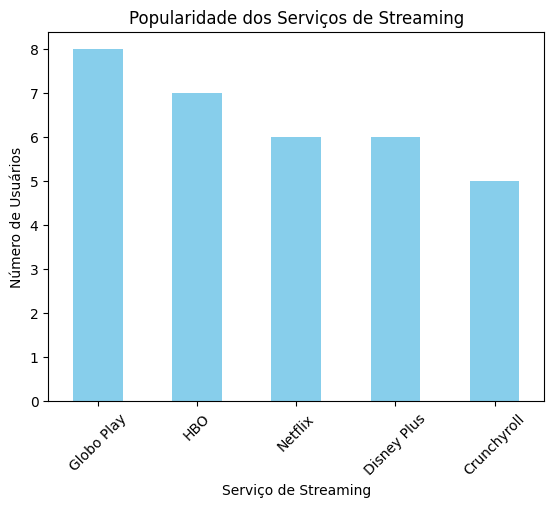

In [47]:
SomaServico.plot(kind='bar', color='skyblue')
plt.title('Popularidade dos Serviços de Streaming')
plt.ylabel('Número de Usuários')
plt.xlabel('Serviço de Streaming')
plt.xticks(rotation=45)
plt.show()


As plataformas que tiverem a maior soma no gráfico foram GloboPlay e HBO, sendo as mais utilizadas pelos seus usuários e, portanto, potencialmente as que oferecem maior retorno de investimento.
Isso pode orientar decisões de parceria com as empresas de streaming que têm maior aderência com seu público.

Cenário 3:
Uma influenciadora digital de bem estar gostaria de analisar possíveis empreendimentos dentro de diferentes propostas que recebe, podendo ser excludentes ou somatórias.

Com isso, vamos selecionar nossas colunas/variáveis de interesse:

In [48]:
df.columns

Index(['Nome', 'Endereço', 'Cidade', 'Estado', 'Telefone', 'Renda Anual',
       'Estado Civil', 'Idade', 'Filhos', 'Moradia', 'Restrição Alimentar',
       'Streaming', 'Usa protetor solar diariamente',
       'Vai na Praia Mensalmente', 'Faz Academia',
       'Compra e Lê Livros Todos os Anos', 'Quantidade de Livros Comprados',
       'Autor Favorito', 'email'],
      dtype='object')

In [52]:
df_influencer = df.copy()
df_influencer = df_influencer.drop(columns = ['Moradia', 'Streaming'])
df_influencer.head()

,Nome,Endereço,Cidade,Estado,Telefone,Renda Anual,Estado Civil,Idade,Filhos,Restrição Alimentar,Usa protetor solar diariamente,Vai na Praia Mensalmente,Faz Academia,Compra e Lê Livros Todos os Anos,Quantidade de Livros Comprados,Autor Favorito,email
0,Maria Clara Novaes,NaN,Carvalho,Mato Grosso do Sul,01139085991,86445.0,NaN,43.0,NaN,Nenhuma,Sim,Não,Sim,NaN,NaN,NaN,mariaclaranovaes285@gemeil.com
1,Davi Lucca Pereira,"Rodovia de Silveira, 67",NaN,Mato Grosso do Sul,NaN,31289.0,NaN,NaN,0.0,NaN,NaN,Não,Sim,Não,NaN,NaN,daviluccapereira933@exemplo.com
2,Sr Caio Caldeira,"Residencial Freitas, 10",Carvalho,Rio Grande do Norte,NaN,NaN,Solteiro,60.0,NaN,Lactose e Glúten,Sim,Não,NaN,Sim,6.0,NaN,srcaiocaldeira626@gemeil.com
3,Kaique Azevedo,NaN,Azevedo,Rio Grande do Sul,NaN,76264.0,Casado,26.0,4.0,Lactose e Glúten,Não,Não,Não,Sim,0.0,Enzo Rezende,kaiqueazevedo731@rotmail.com
4,Pedro Moreira,"Colônia de Oliveira, 87",NaN,NaN,NaN,53295.0,Casado,60.0,5.0,NaN,Sim,Sim,NaN,Sim,7.0,NaN,pedromoreira622@gemeil.com


In [55]:
#Faremos novamente o one-hot-incode na Restrição Alimentar

df_influencer['Restrição Alimentar'].str.get_dummies(sep = ' e ').drop(columns = ['Nenhuma'])
restricao = df_influencer['Restrição Alimentar'].str.get_dummies(sep = ' e ').drop(columns = ['Nenhuma'])

In [56]:
#unindo as colunas one-hot-incode à base de interesse

df_influencer = pd.concat([df_influencer, restricao], axis = 1)
df_influencer.head()

,Nome,Endereço,Cidade,Estado,Telefone,Renda Anual,Estado Civil,Idade,Filhos,Restrição Alimentar,Usa protetor solar diariamente,Vai na Praia Mensalmente,Faz Academia,Compra e Lê Livros Todos os Anos,Quantidade de Livros Comprados,Autor Favorito,email,Glúten,Lactose
0,Maria Clara Novaes,NaN,Carvalho,Mato Grosso do Sul,01139085991,86445.0,NaN,43.0,NaN,Nenhuma,Sim,Não,Sim,NaN,NaN,NaN,mariaclaranovaes285@gemeil.com,0,0
1,Davi Lucca Pereira,"Rodovia de Silveira, 67",NaN,Mato Grosso do Sul,NaN,31289.0,NaN,NaN,0.0,NaN,NaN,Não,Sim,Não,NaN,NaN,daviluccapereira933@exemplo.com,0,0
2,Sr Caio Caldeira,"Residencial Freitas, 10",Carvalho,Rio Grande do Norte,NaN,NaN,Solteiro,60.0,NaN,Lactose e Glúten,Sim,Não,NaN,Sim,6.0,NaN,srcaiocaldeira626@gemeil.com,1,1
3,Kaique Azevedo,NaN,Azevedo,Rio Grande do Sul,NaN,76264.0,Casado,26.0,4.0,Lactose e Glúten,Não,Não,Não,Sim,0.0,Enzo Rezende,kaiqueazevedo731@rotmail.com,1,1
4,Pedro Moreira,"Colônia de Oliveira, 87",NaN,NaN,NaN,53295.0,Casado,60.0,5.0,NaN,Sim,Sim,NaN,Sim,7.0,NaN,pedromoreira622@gemeil.com,0,0


In [59]:
#Agora farei um exemplo de classificação de categoria que pode ser usada futuramente
df_influencer['Idoso'] = np.where(df_influencer.Idade >= 60, True, False)
df_influencer['Idoso']

,Idoso
0,False
1,False
2,True
3,False
4,True
5,False
6,False
7,False
8,True
9,False
